In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt


def visualize_binary(x, y, y_pred, model):
    x_min, x_max = x[:, 0].min().item() - 1, x[:, 0].max().item() + 1
    y_min, y_max = x[:, 1].min().item() - 1, x[:, 1].max().item() + 1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1))
    grid = torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)
    Z = model(grid).detach().numpy().reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y.squeeze(), edgecolors="k",alpha=0.5,s=500)
    plt.scatter(x[:, 0], x[:, 1], c=y_pred.squeeze(), edgecolors="k",alpha=0.5,s = 500,marker='s')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Binary Classification")
    plt.show()

In [3]:
epochs = 1000

x = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]
x = torch.tensor(x, dtype=torch.float32)

In [4]:
linear = nn.Linear(2,1)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear,sigmoid)

0.9179584980010986
0.1453152447938919
0.08216367661952972
0.05677381530404091
0.0431848019361496
0.034766148775815964
0.02905661053955555
0.02493761107325554
0.021829692646861076
0.01940331980586052


/opt/homebrew/anaconda3/envs/torch/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


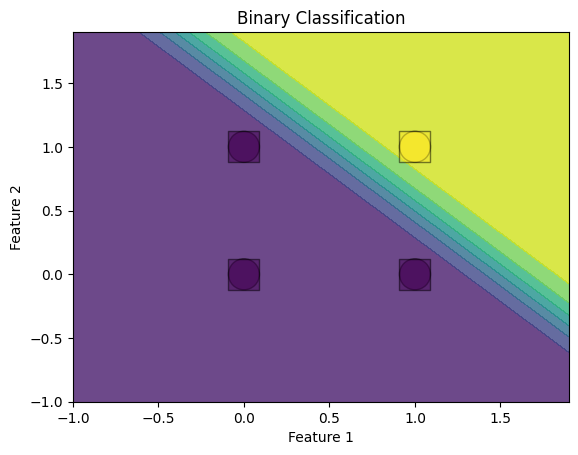

In [5]:
# AND
y = [[0],[0],[0],[1]]
y = torch.tensor(y,dtype=torch.float32)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 1)

for _ in range(epochs):
    # 초기화
    optimizer.zero_grad()
    
    # 예측
    y_pred = model(x)

    # 비용함수
    loss = criterion(y_pred,y)
    loss.backward()
    optimizer.step()
    if _ % 100 == 0 :
        print(f"{loss}")
y_pred=(model(x) > 0.5).to(torch.int)
visualize_binary(x,y,y_pred,model)

5.660731315612793
0.24769935011863708
0.1079382672905922
0.06835080683231354
0.04969114810228348
0.038911253213882446
0.03191928565502167
0.027029214426875114
0.023422803729772568
0.020656034350395203


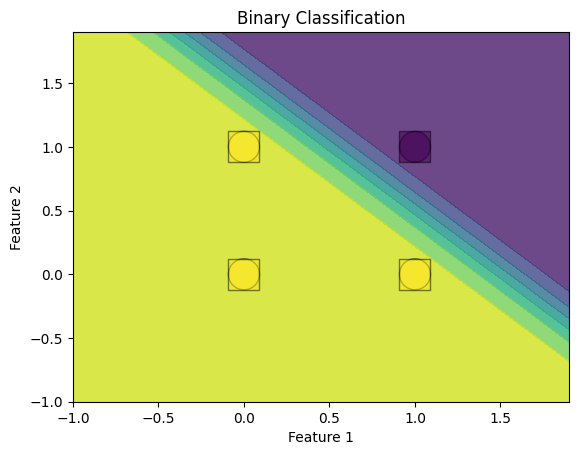

In [6]:
# NAND
y = [[1],[1],[1],[0]]
y = torch.tensor(y,dtype=torch.float32)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 1)

for _ in range(epochs):
    # 초기화
    optimizer.zero_grad()
    
    # 예측
    y_pred = model(x)

    # 비용함수
    loss = criterion(y_pred,y)
    loss.backward()
    optimizer.step()
    if _ % 100 == 0 :
        print(f"{loss}")

y_pred=(model(x) > 0.5).to(torch.int)
visualize_binary(x,y,y_pred,model)

3.665677070617676
0.2570502758026123
0.07519979029893875
0.04249423369765282
0.02935296669602394
0.022344892844557762
0.0180094875395298
0.01506977528333664
0.012948153540492058
0.011346240527927876


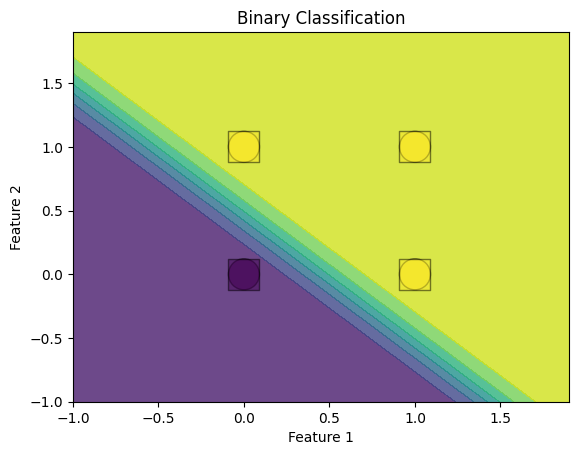

In [7]:
# OR
y = [[0],[1],[1],[1]]
y = torch.tensor(y,dtype=torch.float32)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = 1)

for _ in range(epochs):
    # 초기화
    optimizer.zero_grad()
    
    # 예측
    y_pred = model(x)

    # 비용함수
    loss = criterion(y_pred,y)
    loss.backward()
    optimizer.step()
    if _ % 100 == 0 :
        print(f"{loss}")

y_pred=(model(x) > 0.5).to(torch.int)
visualize_binary(x,y,y_pred,model)

3.3186779022216797
1.946084976196289
1.6425210237503052
1.4413247108459473
1.2531639337539673
1.0838103294372559
0.942929744720459
0.838137686252594
0.7700676321983337
0.7312904596328735


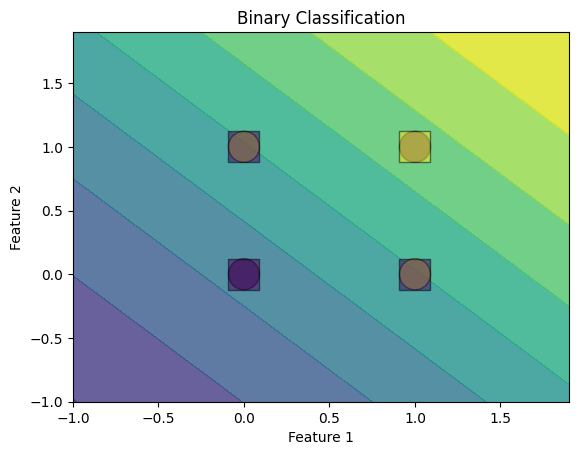

In [8]:
# XOR
y = [[0],[1],[1],[0]]
y = torch.tensor(y,dtype=torch.float32)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr = .1)

for _ in range(epochs):
    # 초기화
    optimizer.zero_grad()
    
    # 예측
    y_pred = model(x)

    # 비용함수
    loss = criterion(y_pred,y)
    loss.backward()
    optimizer.step()
    if _ % 100 == 0 :
        print(f"{loss}")

y_pred=(model(x) > 0.5).to(torch.int)
visualize_binary(x,y,y_pred,model)

In [9]:
y_pred

tensor([[0],
        [0],
        [0],
        [1]], dtype=torch.int32)